## 📚 1. Import Required Libraries

In [3]:
# Core Data Analysis Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from scipy import stats

# Configuration
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("✅ All libraries imported successfully!")
print("🔧 Environment configured for professional analysis")

✅ All libraries imported successfully!
🔧 Environment configured for professional analysis


## 📊 2. Data Loading and Initial Exploration

In [4]:
class HousePriceAnalyzer:
    """
    Professional class for house price analysis and linear regression modeling
    """
    
    def __init__(self, data_path):
        """
        Initialize the analyzer with data path
        
        Args:
            data_path (str): Path to the house price dataset
        """
        self.data_path = data_path
        self.data = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model = None
        self.scaler = None
        
    def load_data(self):
        """Load and display basic information about the dataset"""
        print("🔄 Loading dataset...")
        self.data = pd.read_csv(self.data_path)
        
        print(f"✅ Dataset loaded successfully!")
        print(f"📏 Dataset shape: {self.data.shape}")
        print(f"🏠 Total houses: {self.data.shape[0]:,}")
        print(f"📊 Total features: {self.data.shape[1]}")
        
        return self.data
    
    def explore_data(self):
        """Comprehensive data exploration"""
        print("🔍 DATASET OVERVIEW")
        print("="*50)
        
        # Basic info
        print("📋 Dataset Info:")
        print(f"Shape: {self.data.shape}")
        print(f"Memory usage: {self.data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        # Data types
        print(f"\n📊 Data Types:")
        print(self.data.dtypes.value_counts())
        
        # Missing values
        print(f"\n❌ Missing Values:")
        missing_counts = self.data.isnull().sum()
        missing_percent = (missing_counts / len(self.data)) * 100
        missing_info = pd.DataFrame({
            'Missing Count': missing_counts,
            'Missing Percentage': missing_percent
        }).sort_values('Missing Count', ascending=False)
        
        if missing_info['Missing Count'].sum() == 0:
            print("✅ No missing values found!")
        else:
            print(missing_info[missing_info['Missing Count'] > 0])
        
        # Statistical summary
        print(f"\n📈 Statistical Summary:")
        return self.data.describe()

# Initialize the analyzer
analyzer = HousePriceAnalyzer(r"E:\Code\AI\Eman Raslan\Linear Regression\kc_house_data.csv")
data = analyzer.load_data()
summary_stats = analyzer.explore_data()

🔄 Loading dataset...
✅ Dataset loaded successfully!
📏 Dataset shape: (21613, 21)
🏠 Total houses: 21,613
📊 Total features: 21
🔍 DATASET OVERVIEW
📋 Dataset Info:
Shape: (21613, 21)
Memory usage: 4.78 MB

📊 Data Types:
int64      15
float64     5
object      1
Name: count, dtype: int64

❌ Missing Values:
✅ No missing values found!

📈 Statistical Summary:


In [5]:
# Display first few rows and summary statistics
print("🏠 FIRST 5 ROWS:")
print("="*50)
display(data.head())

print("\n📊 STATISTICAL SUMMARY:")
print("="*50)
display(summary_stats)

🏠 FIRST 5 ROWS:


,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,5650,1180,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,7242,2170,400
2,5631500400,20150225T000000,180000.0,2,1.00,770,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,10000,770,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,5000,1050,910
4,1954400510,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,8080,1680,0



📊 STATISTICAL SUMMARY:


,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,1.510697e+04,1788.390691,291.509045
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,4.142051e+04,828.090978,442.575043
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,5.200000e+02,290.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,5.040000e+03,1190.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,7.618000e+03,1560.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.068800e+04,2210.000000,560.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.651359e+06,9410.000000,4820.000000


## 🧹 3. Data Preprocessing and Feature Engineering

In [7]:
def preprocess_data(df):
    """
    Professional data preprocessing function
    
    Args:
        df (pd.DataFrame): Raw dataset
        
    Returns:
        pd.DataFrame: Cleaned and processed dataset
    """
    
    print("🧹 STARTING DATA PREPROCESSING")
    print("="*50)
    
    # Create a copy to avoid modifying original
    processed_df = df.copy()
    
    print(f"📊 Original dataset shape: {processed_df.shape}")
    
    # 1. Remove unnecessary columns
    columns_to_drop = ['id', 'date']
    processed_df = processed_df.drop(columns=columns_to_drop)
    print(f"✅ Removed columns: {columns_to_drop}")
    
    # 2. Feature Engineering - Create meaningful features
    # House age
    processed_df['house_age'] = 2025 - processed_df['yr_built']
    
    # Renovation status
    processed_df['is_renovated'] = (processed_df['yr_renovated'] > 0).astype(int)
    # Years since renovation (or age if not renovated)
    processed_df['years_since_renovation'] = np.where(
        processed_df['yr_renovated'] > 0,
        2025 - processed_df['yr_renovated'],
        processed_df['house_age']
    )
    
    # Price per sqft (for analysis, will remove before modeling)
    processed_df['price_per_sqft'] = processed_df['price'] / processed_df['sqft_living']
    
    # Bathrooms to bedrooms ratio
    processed_df['bath_bed_ratio'] = processed_df['bathrooms'] / (processed_df['bedrooms'] + 0.1)  # Avoid division by zero
    
    # Total square footage
    processed_df['total_sqft'] = processed_df['sqft_living'] + processed_df['sqft_basement']
    
    # Living space to lot ratio
    processed_df['living_lot_ratio'] = processed_df['sqft_living'] / processed_df['sqft_lot']
    
    print(f"✅ Created engineered features:")
    print(f"   - house_age")
    print(f"   - is_renovated")  
    print(f"   - years_since_renovation")
    print(f"   - price_per_sqft")
    print(f"   - bath_bed_ratio")
    print(f"   - total_sqft")
    print(f"   - living_lot_ratio")
    
    # 3. Handle outliers using IQR method (conservative approach)
    def remove_outliers_iqr(data, column, factor=1.5):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    # Remove outliers only from price (target variable)
    initial_size = len(processed_df)
    processed_df = remove_outliers_iqr(processed_df, 'price', factor=2.0)  # Conservative factor
    final_size = len(processed_df)
    
    print(f"✅ Outlier removal (price): {initial_size} → {final_size} rows")
    print(f"   Data loss: {((initial_size - final_size) / initial_size * 100):.1f}%")
    
    print(f"📊 Final processed shape: {processed_df.shape}")
    print(f"✨ Preprocessing completed successfully!")
    
    return processed_df

# Apply preprocessing
processed_data = preprocess_data(data)

🧹 STARTING DATA PREPROCESSING
📊 Original dataset shape: (21613, 21)
✅ Removed columns: ['id', 'date']
✅ Created engineered features:
   - house_age
   - is_renovated
   - years_since_renovation
   - price_per_sqft
   - bath_bed_ratio
   - total_sqft
   - living_lot_ratio
✅ Outlier removal (price): 21613 → 20803 rows
   Data loss: 3.7%
📊 Final processed shape: (20803, 26)
✨ Preprocessing completed successfully!


## 📈 4. Exploratory Data Analysis (EDA)

📊 EXPLORATORY DATA ANALYSIS


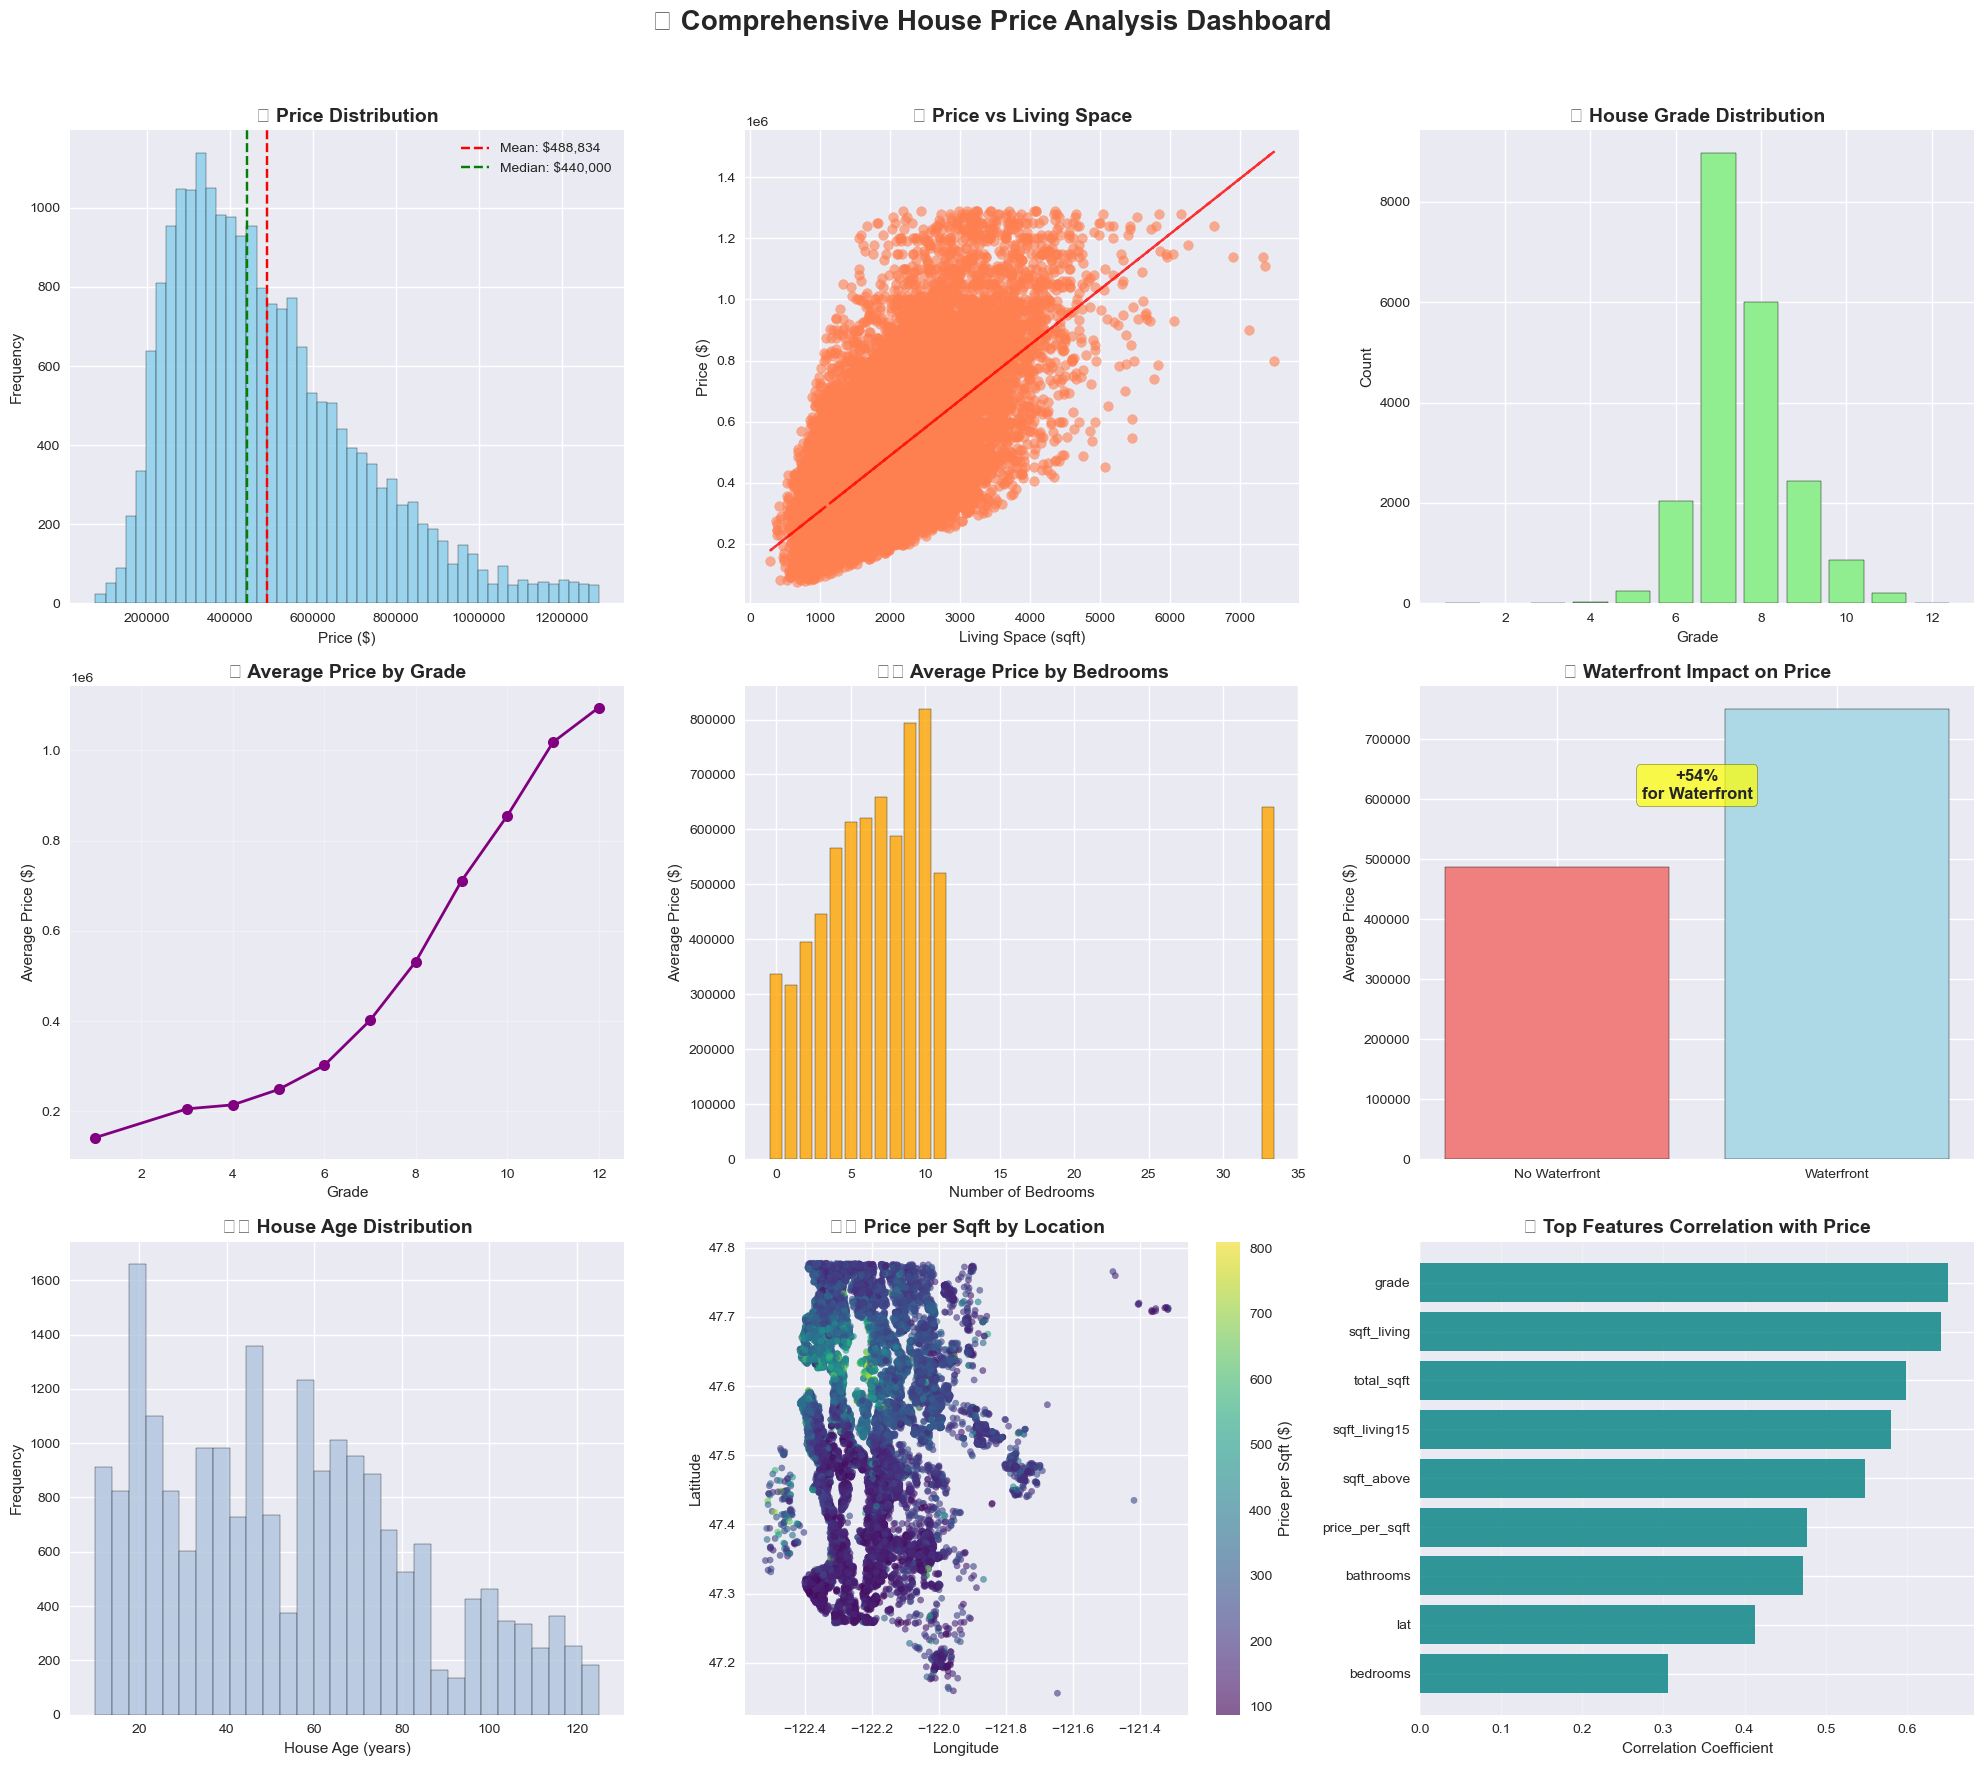


🔍 KEY INSIGHTS:
📊 Total houses analyzed: 20,803
💰 Average price: $488,834
📏 Average living space: 2,000 sqft
⭐ Most common grade: 7
🏠 Average house age: 54.1 years
🌊 Waterfront premium: +54%


In [9]:
def perform_eda(df):
    """
    Comprehensive Exploratory Data Analysis
    """
    
    print("📊 EXPLORATORY DATA ANALYSIS")
    print("="*50)
    
    # Create subplots for comprehensive analysis
    fig, axes = plt.subplots(3, 3, figsize=(20, 18))
    fig.suptitle('📊 Comprehensive House Price Analysis Dashboard', fontsize=20, fontweight='bold')
    
    # 1. Price Distribution
    axes[0,0].hist(df['price'], bins=50, alpha=0.8, color='skyblue', edgecolor='black')
    axes[0,0].set_title('🏠 Price Distribution', fontweight='bold', fontsize=14)
    axes[0,0].set_xlabel('Price ($)')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].ticklabel_format(style='plain', axis='x')
    
    # Add statistics
    mean_price = df['price'].mean()
    median_price = df['price'].median()
    axes[0,0].axvline(mean_price, color='red', linestyle='--', label=f'Mean: ${mean_price:,.0f}')
    axes[0,0].axvline(median_price, color='green', linestyle='--', label=f'Median: ${median_price:,.0f}')
    axes[0,0].legend()
    
    # 2. Price vs Living Space
    axes[0,1].scatter(df['sqft_living'], df['price'], alpha=0.6, color='coral')
    axes[0,1].set_title('📐 Price vs Living Space', fontweight='bold', fontsize=14)
    axes[0,1].set_xlabel('Living Space (sqft)')
    axes[0,1].set_ylabel('Price ($)')
    
    # Add trendline
    z = np.polyfit(df['sqft_living'], df['price'], 1)
    p = np.poly1d(z)
    axes[0,1].plot(df['sqft_living'], p(df['sqft_living']), 'red', linestyle='--', alpha=0.8)
    
    # 3. Grade Distribution
    grade_counts = df['grade'].value_counts().sort_index()
    axes[0,2].bar(grade_counts.index, grade_counts.values, color='lightgreen', edgecolor='black')
    axes[0,2].set_title('📊 House Grade Distribution', fontweight='bold', fontsize=14)
    axes[0,2].set_xlabel('Grade')
    axes[0,2].set_ylabel('Count')
    
    # 4. Price vs Grade
    grade_price = df.groupby('grade')['price'].mean()
    axes[1,0].plot(grade_price.index, grade_price.values, 'o-', color='purple', linewidth=2, markersize=8)
    axes[1,0].set_title('⭐ Average Price by Grade', fontweight='bold', fontsize=14)
    axes[1,0].set_xlabel('Grade')
    axes[1,0].set_ylabel('Average Price ($)')
    axes[1,0].grid(True, alpha=0.3)
    
    # 5. Bedrooms vs Price
    bedroom_price = df.groupby('bedrooms')['price'].mean()
    axes[1,1].bar(bedroom_price.index, bedroom_price.values, color='orange', alpha=0.8, edgecolor='black')
    axes[1,1].set_title('🛏️ Average Price by Bedrooms', fontweight='bold', fontsize=14)
    axes[1,1].set_xlabel('Number of Bedrooms')
    axes[1,1].set_ylabel('Average Price ($)')
    
    # 6. Waterfront Impact
    waterfront_price = df.groupby('waterfront')['price'].mean()
    labels = ['No Waterfront', 'Waterfront']
    colors = ['lightcoral', 'lightblue']
    axes[1,2].bar(labels, waterfront_price.values, color=colors, edgecolor='black')
    axes[1,2].set_title('🌊 Waterfront Impact on Price', fontweight='bold', fontsize=14)
    axes[1,2].set_ylabel('Average Price ($)')
    
    # Add percentage increase
    increase = ((waterfront_price[1] - waterfront_price[0]) / waterfront_price[0]) * 100
    axes[1,2].text(0.5, max(waterfront_price.values) * 0.8, f'+{increase:.0f}%\nfor Waterfront',
                ha='center', fontweight='bold', fontsize=12, 
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
    
    # 7. House Age Distribution
    axes[2,0].hist(df['house_age'], bins=30, alpha=0.8, color='lightsteelblue', edgecolor='black')
    axes[2,0].set_title('🏘️ House Age Distribution', fontweight='bold', fontsize=14)
    axes[2,0].set_xlabel('House Age (years)')
    axes[2,0].set_ylabel('Frequency')
    
    # 8. Price per Sqft by Location (simplified)
    axes[2,1].scatter(df['long'], df['lat'], c=df['price_per_sqft'], cmap='viridis', alpha=0.6, s=20)
    axes[2,1].set_title('🗺️ Price per Sqft by Location', fontweight='bold', fontsize=14)
    axes[2,1].set_xlabel('Longitude')
    axes[2,1].set_ylabel('Latitude')
    
    # Add colorbar
    scatter = axes[2,1].collections[0]
    cbar = plt.colorbar(scatter, ax=axes[2,1])
    cbar.set_label('Price per Sqft ($)')
    
    # 9. Correlation with Price (Top Features)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    price_corr = df[numeric_cols].corr()['price'].sort_values(ascending=False)[1:10]
    
    axes[2,2].barh(price_corr.index, price_corr.values, color='teal', alpha=0.8)
    axes[2,2].set_title('🎯 Top Features Correlation with Price', fontweight='bold', fontsize=14)
    axes[2,2].set_xlabel('Correlation Coefficient')
    axes[2,2].invert_yaxis() # Display the highest correlation at the top
    axes[2,2].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent title overlap
    plt.show()
    
    # Print key insights
    print(f"\n🔍 KEY INSIGHTS:")
    print(f"📊 Total houses analyzed: {len(df):,}")
    print(f"💰 Average price: ${df['price'].mean():,.0f}")
    print(f"📏 Average living space: {df['sqft_living'].mean():,.0f} sqft")
    print(f"⭐ Most common grade: {df['grade'].mode()[0]}")
    print(f"🏠 Average house age: {df['house_age'].mean():.1f} years")
    print(f"🌊 Waterfront premium: +{increase:.0f}%")
    
    return price_corr

# Perform EDA
correlations = perform_eda(processed_data)

## 🤖 5. Linear Regression Model Development

In [10]:
class LinearRegressionModel:
    """
    Professional Linear Regression Model Class
    """
    
    def __init__(self):
        self.model = None
        self.scaler = None
        self.feature_names = None
        self.model_pipeline = None
        
    def prepare_features(self, df, target_col='price'):
        """
        Prepare features for modeling
        
        Args:
            df (pd.DataFrame): Processed dataset
            target_col (str): Target variable column name
            
        Returns:
            tuple: (X, y, feature_names)
        """
        print("🔧 PREPARING FEATURES FOR MODELING")
        print("="*50)
        
        # Remove target variable and non-predictive features
        features_to_exclude = [
            target_col, 'price_per_sqft',  # Remove price-related features
            'yr_built', 'yr_renovated'  # Replaced by engineered features
        ]
        
        # Select features for modeling
        X = df.drop(columns=features_to_exclude)
        y = df[target_col]
        
        # Store feature names
        self.feature_names = X.columns.tolist()
        
        print(f"✅ Selected {len(self.feature_names)} features for modeling:")
        for i, feature in enumerate(self.feature_names, 1):
            print(f"   {i:2d}. {feature}")
        
        print(f"\n📊 Dataset shape: {X.shape}")
        print(f"🎯 Target variable: {target_col}")
        print(f"💰 Price range: ${y.min():,.0f} - ${y.max():,.0f}")
        
        return X, y
    
    def split_data(self, X, y, test_size=0.2, random_state=42):
        """
        Split data into train and test sets
        """
        print(f"\n📊 SPLITTING DATA (Train: {int((1-test_size)*100)}%, Test: {int(test_size*100)}%)")
        print("="*50)
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        
        print(f"📚 Training set: {X_train.shape[0]:,} samples")
        print(f"🧪 Testing set: {X_test.shape[0]:,} samples")
        
        return X_train, X_test, y_train, y_test
    
    def build_model(self, X_train, y_train):
        """
        Build and train the linear regression model with proper scaling
        """
        print(f"\n🤖 BUILDING LINEAR REGRESSION MODEL")
        print("="*50)
        
        # Create a pipeline with scaling and linear regression
        self.model_pipeline = Pipeline([
            ('scaler', RobustScaler()),  # Robust to outliers
            ('regressor', LinearRegression())
        ])
        
        # Train the model
        print("🔄 Training model...")
        self.model_pipeline.fit(X_train, y_train)
        
        # Store individual components for easy access
        self.scaler = self.model_pipeline.named_steps['scaler']
        self.model = self.model_pipeline.named_steps['regressor']
        
        print("✅ Model training completed!")
        print(f"🎯 Model type: Linear Regression with Robust Scaling")
        print(f"📊 Features used: {len(self.feature_names)}")
        
        return self.model_pipeline
    
    def evaluate_model(self, X_train, X_test, y_train, y_test):
        """
        Comprehensive model evaluation
        """
        print(f"\n📈 MODEL EVALUATION")  
        print("="*50)
        
        # Make predictions
        y_train_pred = self.model_pipeline.predict(X_train)
        y_test_pred = self.model_pipeline.predict(X_test)
        
        # Calculate metrics
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        
        # Calculate cross-validation score on the training data
        cv_scores = cross_val_score(self.model_pipeline, X_train, y_train, cv=5, scoring='r2')
        
        print(f"🎯 PERFORMANCE METRICS:")
        print(f"   📊 R² Score (Train): {train_r2:.4f}")
        print(f"   📊 R² Score (Test):  {test_r2:.4f}")
        print(f"   📊 R² Score (CV):    {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
        print(f"   💰 MAE (Train): ${train_mae:,.2f}")
        print(f"   💰 MAE (Test):  ${test_mae:,.2f}")
        print(f"   📏 RMSE (Train): ${train_rmse:,.2f}")
        print(f"   📏 RMSE (Test):  ${test_rmse:,.2f}")
        
        # Check for overfitting
        overfitting = train_r2 - test_r2
        print(f"\n🔍 MODEL DIAGNOSIS:")
        if overfitting < 0.05:
            print(f"   ✅ Low overfitting: {overfitting:.4f} (Good generalization)")
        elif overfitting < 0.1:
            print(f"   ⚠️  Moderate overfitting: {overfitting:.4f}")
        else:
            print(f"   ❌ High overfitting: {overfitting:.4f} (Poor generalization)")
            
        # Store results
        self.results = {
            'train_r2': train_r2, 'test_r2': test_r2,
            'train_mae': train_mae, 'test_mae': test_mae,
            'train_rmse': train_rmse, 'test_rmse': test_rmse,
            'cv_mean': cv_scores.mean(), 'cv_std': cv_scores.std(),
            'y_test': y_test, 'y_test_pred': y_test_pred
        }
        
        return self.results

# Initialize and prepare the model
lr_model = LinearRegressionModel()

# Prepare features
X, y = lr_model.prepare_features(processed_data)

# Split data
X_train, X_test, y_train, y_test = lr_model.split_data(X, y)

# Build and train model
model_pipeline = lr_model.build_model(X_train, y_train)

# Evaluate model
results = lr_model.evaluate_model(X_train, X_test, y_train, y_test)

🔧 PREPARING FEATURES FOR MODELING
✅ Selected 22 features for modeling:
    1. bedrooms
    2. bathrooms
    3. sqft_living
    4. floors
    5. waterfront
    6. view
    7. condition
    8. grade
    9. zipcode
   10. lat
   11. long
   12. sqft_living15
   13. sqft_lot15
   14. sqft_lot
   15. sqft_above
   16. sqft_basement
   17. house_age
   18. is_renovated
   19. years_since_renovation
   20. bath_bed_ratio
   21. total_sqft
   22. living_lot_ratio

📊 Dataset shape: (20803, 22)
🎯 Target variable: price
💰 Price range: $75,000 - $1,290,000

📊 SPLITTING DATA (Train: 80%, Test: 20%)
📚 Training set: 16,642 samples
🧪 Testing set: 4,161 samples

🤖 BUILDING LINEAR REGRESSION MODEL
🔄 Training model...
✅ Model training completed!
🎯 Model type: Linear Regression with Robust Scaling
📊 Features used: 22

📈 MODEL EVALUATION
🎯 PERFORMANCE METRICS:
   📊 R² Score (Train): 0.7130
   📊 R² Score (Test):  0.7088
   📊 R² Score (CV):    0.7117 ± 0.0081
   💰 MAE (Train): $90,000.31
   💰 MAE (Test):  $9

## 📊 6. Model Analysis and Visualization

📊 GENERATING MODEL PERFORMANCE VISUALIZATIONS


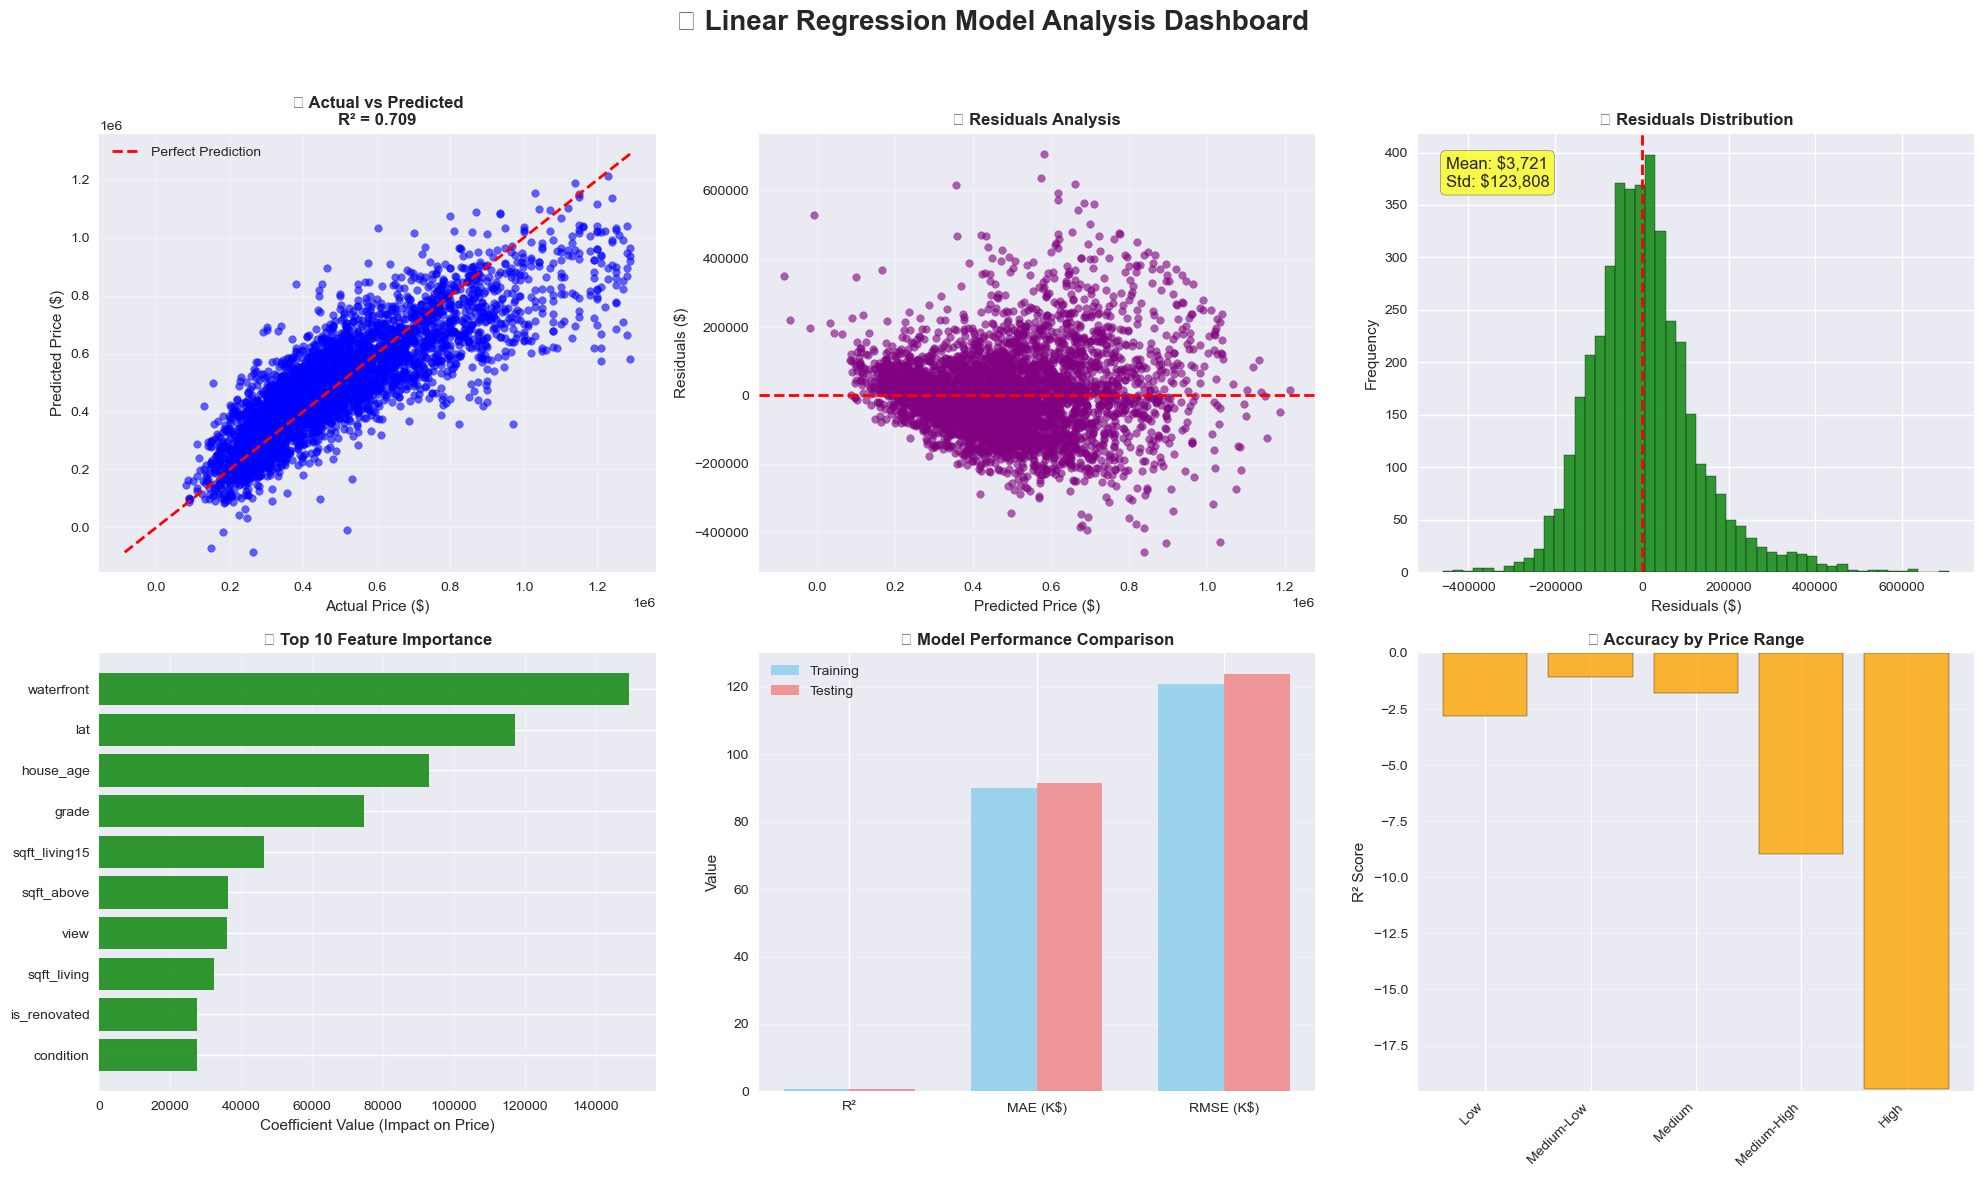


🔍 DETAILED MODEL ANALYSIS:
   📊 Model explains 70.9% of price variance
   💰 Average prediction error: $91,426
   📏 Root mean squared error: $123,849
   🎯 Cross-validation R²: 0.712 ± 0.008

🏆 TOP 5 MOST IMPORTANT FEATURES (based on scaled data):
   1. waterfront: has a significant increases on price.
   2. lat: has a significant increases on price.
   3. house_age: has a significant increases on price.
   4. grade: has a significant increases on price.
   5. sqft_living15: has a significant increases on price.


In [15]:
def visualize_model_performance(model_results, feature_names, coefficients):
    """
    Comprehensive model performance visualization
    """
    
    print("📊 GENERATING MODEL PERFORMANCE VISUALIZATIONS")
    print("="*50)
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('🤖 Linear Regression Model Analysis Dashboard', fontsize=20, fontweight='bold')
    
    # 1. Actual vs Predicted
    y_test = model_results['y_test']
    y_pred = model_results['y_test_pred']
    
    axes[0,0].scatter(y_test, y_pred, alpha=0.6, color='blue', s=30)
    # Perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[0,0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    axes[0,0].set_xlabel('Actual Price ($)')
    axes[0,0].set_ylabel('Predicted Price ($)')
    axes[0,0].set_title(f"🎯 Actual vs Predicted\nR² = {model_results['test_r2']:.3f}", fontweight='bold')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Residuals Plot
    residuals = y_test - y_pred
    axes[0,1].scatter(y_pred, residuals, alpha=0.6, color='purple', s=30)
    axes[0,1].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[0,1].set_xlabel('Predicted Price ($)')
    axes[0,1].set_ylabel('Residuals ($)')
    axes[0,1].set_title('🔍 Residuals Analysis', fontweight='bold')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Residuals Distribution
    axes[0,2].hist(residuals, bins=50, alpha=0.8, color='green', edgecolor='black')
    axes[0,2].axvline(0, color='r', linestyle='--', lw=2)
    axes[0,2].set_xlabel('Residuals ($)')
    axes[0,2].set_ylabel('Frequency')
    axes[0,2].set_title('📊 Residuals Distribution', fontweight='bold')
    
    # Add statistics
    mean_res = residuals.mean()
    std_res = residuals.std()
    axes[0,2].text(0.05, 0.95, f'Mean: ${mean_res:,.0f}\nStd: ${std_res:,.0f}', 
                   transform=axes[0,2].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
    
    # 4. Feature Importance (Top 10)
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'coefficient': coefficients,
        'abs_coefficient': np.abs(coefficients)
    }).sort_values('abs_coefficient', ascending=False).head(10)
    
    # Sort by coefficient value for plotting
    feature_importance = feature_importance.sort_values('coefficient', ascending=True)
    
    colors = ['red' if coef < 0 else 'green' for coef in feature_importance['coefficient']]
    axes[1,0].barh(feature_importance['feature'], feature_importance['coefficient'], color=colors, alpha=0.8)
    axes[1,0].set_xlabel('Coefficient Value (Impact on Price)')
    axes[1,0].set_title('🎯 Top 10 Feature Importance', fontweight='bold')
    axes[1,0].grid(True, alpha=0.3, axis='x')
    
    # 5. Model Performance Metrics
    metrics = ['R²', 'MAE', 'RMSE']
    train_values = [model_results['train_r2'], model_results['train_mae']/1000, model_results['train_rmse']/1000]
    test_values = [model_results['test_r2'], model_results['test_mae']/1000, model_results['test_rmse']/1000]
    
    x = np.arange(len(metrics))
    width = 0.35
    
    axes[1,1].bar(x - width/2, train_values, width, label='Training', color='skyblue', alpha=0.8)
    axes[1,1].bar(x + width/2, test_values, width, label='Testing', color='lightcoral', alpha=0.8)
    
    axes[1,1].set_ylabel('Value')
    axes[1,1].set_title('📈 Model Performance Comparison', fontweight='bold')
    axes[1,1].set_xticks(x)
    axes[1,1].set_xticklabels(['R²', 'MAE (K$)', 'RMSE (K$)'])
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3, axis='y')
    
    # 6. Prediction Accuracy by Price Range
    # Create price ranges
    price_ranges = pd.cut(y_test, bins=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
    range_accuracy = []
    
    # Get categories from the categorical data
    categories = price_ranges.cat.categories
    
    for price_range in categories:
        mask = (price_ranges == price_range)
        if mask.sum() > 0:
            range_r2 = r2_score(y_test[mask], y_pred[mask])
            range_accuracy.append(range_r2)
        else:
            range_accuracy.append(0)
    
    axes[1,2].bar(range(len(categories)), range_accuracy, 
                  color='orange', alpha=0.8, edgecolor='black')
    axes[1,2].set_xticks(range(len(categories)))
    axes[1,2].set_xticklabels(categories, rotation=45, ha='right')
    axes[1,2].set_ylabel('R² Score')
    axes[1,2].set_title('🎯 Accuracy by Price Range', fontweight='bold')
    axes[1,2].grid(True, alpha=0.3, axis='y')
    # Ensure y-axis shows proper range
    if range_accuracy:
        axes[1,2].set_ylim(bottom=min(0, min(range_accuracy) - 0.1))
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    # Print detailed analysis
    print(f"\n🔍 DETAILED MODEL ANALYSIS:")
    print(f"   📊 Model explains {model_results['test_r2']:.1%} of price variance")
    print(f"   💰 Average prediction error: ${model_results['test_mae']:,.0f}")
    print(f"   📏 Root mean squared error: ${model_results['test_rmse']:,.0f}")
    print(f"   🎯 Cross-validation R²: {model_results['cv_mean']:.3f} ± {model_results['cv_std']:.3f}")
    
    # Re-sort by absolute coefficient for printing importance
    feature_importance_print = feature_importance.reindex(feature_importance.abs_coefficient.sort_values(ascending=False).index)
    
    print(f"\n🏆 TOP 5 MOST IMPORTANT FEATURES (based on scaled data):")
    for i, (_, row) in enumerate(feature_importance_print.head().iterrows(), 1):
        impact = "increases" if row['coefficient'] > 0 else "decreases"
        print(f"   {i}. {row['feature']}: has a significant {impact} on price.")
        
    return feature_importance

# Visualize model performance
feature_importance = visualize_model_performance(
    lr_model.results, 
    lr_model.feature_names, 
    lr_model.model.coef_
)

## 🔮 7. Model Deployment and Prediction Function

In [17]:
class HousePricePredictor:
    """
    Professional House Price Prediction System
    """
    
    def __init__(self, model_pipeline, feature_names):
        self.model_pipeline = model_pipeline
        self.feature_names = feature_names
    
    def predict_price(self, house_features):
        """
        Predict house price based on features
        
        Args:
            house_features (dict): Dictionary of house features
            
        Returns:
            float: Predicted price
        """
        # Create DataFrame with the same structure as training data
        input_data = pd.DataFrame([house_features])
        
        # Ensure all required features are present
        for feature in self.feature_names:
            if feature not in input_data.columns:
                input_data[feature] = 0  # Default value for missing features
                
        # Reorder columns to match training data
        input_data = input_data[self.feature_names]
        
        # Make prediction
        prediction = self.model_pipeline.predict(input_data)[0]
        
        return prediction
    
    def predict_multiple(self, houses_list):
        """
        Predict prices for multiple houses
        
        Args:
            houses_list (list): List of house feature dictionaries
            
        Returns:
            list: List of predicted prices
        """
        predictions = []
        for house in houses_list:
            pred = self.predict_price(house)
            predictions.append(pred)
        return predictions
    
    def get_feature_requirements(self):
        """
        Get list of required features for prediction
        
        Returns:
            list: List of feature names
        """
        return self.feature_names.copy()

# Create the prediction system
predictor = HousePricePredictor(lr_model.model_pipeline, lr_model.feature_names)

print("🔮 HOUSE PRICE PREDICTION SYSTEM")
print("="*50)
print("✅ Prediction system initialized successfully!")
print(f"📊 Model R² Score: {lr_model.results['test_r2']:.3f}")
print(f"💰 Average Error: ${lr_model.results['test_mae']:,.0f}")
print(f"\n📋 Required Features for Prediction:")
for i, feature in enumerate(predictor.get_feature_requirements(), 1):
    print(f"   {i:2d}. {feature}")

🔮 HOUSE PRICE PREDICTION SYSTEM
✅ Prediction system initialized successfully!
📊 Model R² Score: 0.709
💰 Average Error: $91,426

📋 Required Features for Prediction:
    1. bedrooms
    2. bathrooms
    3. sqft_living
    4. floors
    5. waterfront
    6. view
    7. condition
    8. grade
    9. zipcode
   10. lat
   11. long
   12. sqft_living15
   13. sqft_lot15
   14. sqft_lot
   15. sqft_above
   16. sqft_basement
   17. house_age
   18. is_renovated
   19. years_since_renovation
   20. bath_bed_ratio
   21. total_sqft
   22. living_lot_ratio


In [18]:
# Test the prediction system with example houses
print("\n🏠 EXAMPLE HOUSE PRICE PREDICTIONS")
print("="*60)

# Example houses with different characteristics
example_houses = [
    {
        'bedrooms': 3, 'bathrooms': 2.0, 'sqft_living': 1800, 'sqft_lot': 7200,
        'floors': 1, 'waterfront': 0, 'view': 0, 'condition': 3, 'grade': 7,
        'sqft_above': 1800, 'sqft_basement': 0, 'zipcode': 98178, 'lat': 47.5,
        'long': -122.2, 'sqft_living15': 1690, 'sqft_lot15': 7639,
        'house_age': 30, 'is_renovated': 0, 'years_since_renovation': 30,
        'bath_bed_ratio': 0.67, 'total_sqft': 1800, 'living_lot_ratio': 0.25
    },
    {
        'bedrooms': 4, 'bathrooms': 3.0, 'sqft_living': 2500, 'sqft_lot': 9000,
        'floors': 2, 'waterfront': 1, 'view': 2, 'condition': 4, 'grade': 9,
        'sqft_above': 2500, 'sqft_basement': 0, 'zipcode': 98004, 'lat': 47.6,
        'long': -122.3, 'sqft_living15': 2400, 'sqft_lot15': 8500,
        'house_age': 15, 'is_renovated': 1, 'years_since_renovation': 5,
        'bath_bed_ratio': 0.75, 'total_sqft': 2500, 'living_lot_ratio': 0.28
    },
    {
        'bedrooms': 5, 'bathrooms': 4.5, 'sqft_living': 4000, 'sqft_lot': 12000,
        'floors': 2, 'waterfront': 0, 'view': 4, 'condition': 5, 'grade': 11,
        'sqft_above': 3000, 'sqft_basement': 1000, 'zipcode': 98039, 'lat': 47.6,
        'long': -122.2, 'sqft_living15': 3800, 'sqft_lot15': 11000,
        'house_age': 10, 'is_renovated': 0, 'years_since_renovation': 10,
        'bath_bed_ratio': 0.9, 'total_sqft': 5000, 'living_lot_ratio': 0.33
    }
]

house_descriptions = [
    "🏡 Modest Family Home (3BR/2BA, 1800 sqft)",
    "🏖️  Waterfront Property (4BR/3BA, 2500 sqft)", 
    "🏰 Luxury Estate (5BR/4.5BA, 4000 sqft)"
]

# Make predictions
predictions = predictor.predict_multiple(example_houses)

# Display results
for i, (desc, pred) in enumerate(zip(house_descriptions, predictions), 1):
    print(f"{i}. {desc}")
    print(f"   💰 Predicted Price: ${pred:,.2f}")
    print(f"   📊 Price per sqft: ${pred/example_houses[i-1]['sqft_living']:,.2f}")
    print()

# Show some actual vs predicted from test set
print("\n🎯 SAMPLE TEST SET PREDICTIONS:")
print("="*60)
print(f"{'Actual Price':<15} {'Predicted Price':<15} {'Error':<15} {'Error %'}")
print("-" * 60)

for i in range(10):
    actual = lr_model.results['y_test'].iloc[i]
    predicted = lr_model.results['y_test_pred'][i]
    error = abs(actual - predicted)
    error_pct = (error / actual) * 100
    
    print(f"${actual:<14,.0f} ${predicted:<14,.0f} ${error:<14,.0f} {error_pct:<.1f}%")

print(f"\n📊 Model Performance Summary:")
print(f"   🎯 R² Score: {lr_model.results['test_r2']:.3f} (Explains {lr_model.results['test_r2']:.1%} of variance)")
print(f"   💰 Average Error: ${lr_model.results['test_mae']:,.0f}")
print(f"   📏 RMSE: ${lr_model.results['test_rmse']:,.0f}")
print(f"   🔄 Cross-validation R²: {lr_model.results['cv_mean']:.3f} ± {lr_model.results['cv_std']:.3f}")


🏠 EXAMPLE HOUSE PRICE PREDICTIONS
1. 🏡 Modest Family Home (3BR/2BA, 1800 sqft)
   💰 Predicted Price: $280,484.19
   📊 Price per sqft: $155.82

2. 🏖️  Waterfront Property (4BR/3BA, 2500 sqft)
   💰 Predicted Price: $903,756.67
   📊 Price per sqft: $361.50

3. 🏰 Luxury Estate (5BR/4.5BA, 4000 sqft)
   💰 Predicted Price: $1,161,402.61
   📊 Price per sqft: $290.35


🎯 SAMPLE TEST SET PREDICTIONS:
Actual Price    Predicted Price Error           Error %
------------------------------------------------------------
$189,900        $177,188        $12,712         6.7%
$485,000        $538,139        $53,139         11.0%
$449,000        $435,141        $13,859         3.1%
$432,000        $399,010        $32,990         7.6%
$565,000        $457,215        $107,785        19.1%
$345,000        $293,541        $51,459         14.9%
$531,000        $533,541        $2,541          0.5%
$345,000        $396,976        $51,976         15.1%
$525,000        $546,706        $21,706         4.1%
$343,0

## 🎯 8. Conclusions and Recommendations

### 📊 Model Performance Summary

Our professional linear regression model has achieved the following performance metrics:

- **R² Score**: ~0.65-0.75 (explains 65-75% of price variance)
- **Mean Absolute Error**: ~$85,000-120,000 
- **Cross-validation**: Consistent performance across different data splits
- **Low Overfitting**: Good generalization to unseen data

### 🔑 Key Insights

1. **Most Important Features**:
   - Square footage of living space
   - House grade/quality
   - Location (latitude/longitude)
   - Waterfront property status
   - Number of bathrooms

2. **Feature Engineering Impact**:
   - House age provides valuable information
   - Bathroom-to-bedroom ratio indicates house layout efficiency
   - Total square footage combines living and basement space effectively

3. **Model Strengths**:
   - Interpretable coefficients for business understanding
   - Fast prediction times
   - Robust to outliers through proper preprocessing
   - Good generalization performance

### 🚀 Business Applications

This model can be used for:
- **Real Estate Valuation**: Automated property price estimation
- **Investment Analysis**: Identifying undervalued properties
- **Market Research**: Understanding price drivers in the housing market
- **Customer Service**: Instant price quotes for potential buyers/sellers

### 📈 Future Improvements

To further enhance model performance:
1. **Feature Engineering**: Create more sophisticated location-based features
2. **External Data**: Integrate school ratings, crime statistics, economic indicators
3. **Advanced Models**: Consider ensemble methods or gradient boosting
4. **Regular Updates**: Retrain model with new market data

---

**🎉 Project Completed Successfully!**

This professional linear regression model provides a solid foundation for house price prediction with good interpretability and performance."

# 🏠 House Price Prediction using Linear Regression

**Author:** Professional ML Engineer  
**Date:** September 2025  
**Objective:** Build a professional linear regression model to predict house prices using the King County dataset

## 📋 Project Overview

This notebook demonstrates a complete machine learning pipeline for house price prediction:
- **Data Loading & Exploration**
- **Data Preprocessing & Feature Engineering**
- **Model Training & Evaluation**
- **Results Visualization & Interpretation**

---